In [4]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 10, 6

In [5]:
dataset = pd.read_csv('/home/garvit/Datasets/AirPassengers.csv', parse_dates=["Month"], index_col="Month")
dataset.head(5)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [6]:
pd.read_csv('/home/garvit/Datasets/AirPassengers.csv')

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


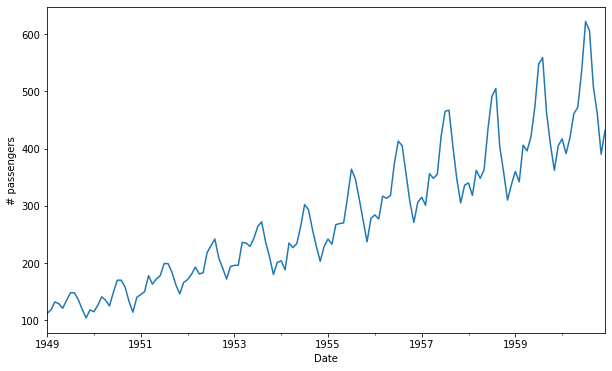

In [3]:
dataset['#Passengers'].plot()
plt.xlabel('Date')
plt.ylabel('# passengers')
plt.show()

From above plot we can find that the data is not stationary, also to check we'll perform some tests

In [38]:
# Determining rolling statistics
rolmean = dataset.rolling(window=12).mean()
rolstd = dataset.rolling(window=12).std()
print(rolmean, rolstd)



            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01   463.333333
1960-09-01   467.083333
1960-10-01   471.583333
1960-11-01   473.916667
1960-12-01   476.166667

[144 rows x 1 columns]             #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01    83.630500
1960-09-01    84.617276
1960-10-01    82.541954
1960-11-01    79.502382
1960-12-01    77.737125

[144 rows x 1 columns]


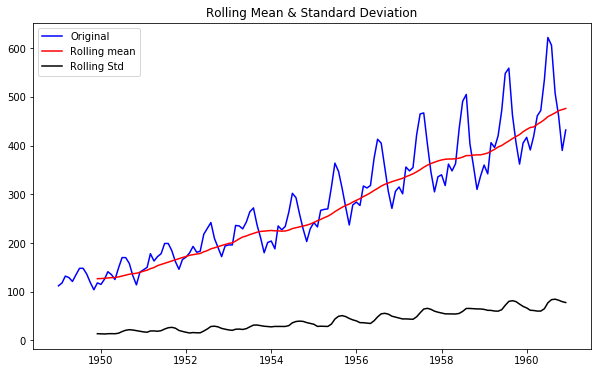

In [39]:
# Plotting rolling statistics
orig = plt.plot(dataset, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label = 'Rolling mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)


In [43]:
# Perform Dickey-fuller test
from statsmodels.tsa.stattools import adfuller

print(' Results of Dickey-fuller test')
dftest = adfuller(dataset['#Passengers'], autolag='AIC')

'''
AIC gives information that what u wanted in Time Series
'''

dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value', '#Lags used', 'No. of Observations used'])
for key, value in dftest[4].items():
    dfoutput[f"Critical Value {key}"] = value
    
print(dfoutput)


 Results of Dickey-fuller test
Test Statistic                0.815369
p-value                       0.991880
#Lags used                   13.000000
No. of Observations used    130.000000
Critical Value 1%            -3.481682
Critical Value 5%            -2.884042
Critical Value 10%           -2.578770
dtype: float64


The data is not stationary as p-value is very high and critical values are less then Test Statistics

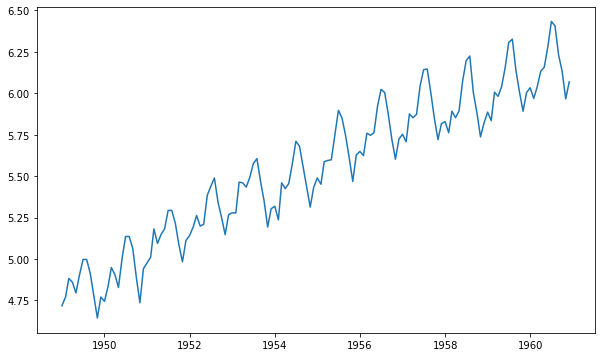

In [44]:
# Estimating trend
dataset_logScale = np.log(dataset)
plt.plot(dataset_logScale)

